In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import SRC.function as F
import re
df = pd.read_csv("INPUT/GSAF5.csv", encoding = "cp1252")
df.head()


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [2]:
# Remove columns with NaN values for all or almost all elements

null_cols = df.isnull().sum()
dim = df.shape
print("\nTotal number of values: ",dim[0])
print("\nTotal count of NaN values: \n\n",null_cols)

# we remove columns with at least 90% of NaN

drop_cols = list(null_cols[null_cols > df.shape[0]*0.9].index)
print("\nColumns to drop: \n",*drop_cols)
df = df.drop(drop_cols,axis=1)



Total number of values:  5992

Total count of NaN values: 

 Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
pdf                          0
href formula                 1
href                         3
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

Columns to drop: 
 Unnamed: 22 Unnamed: 23


In [3]:
# the next step is to remove similar columns
# we can also delete columns "Case Number.1" and "Case Number.2", as they are very similar to "Case Number" column
                             
drop1 = sum(df["Case Number"]==df["Case Number.1"])
drop2 = sum(df["Case Number"]==df["Case Number.2"])
                           
print("\nCommon elements between Case Number and Case Number.1: {} ({}%)".format(drop1,round(drop1*100/dim[0],2)))
print("Common elements between Case Number and Case Number.2: {} ({}%)".format(drop2,round(drop2*100/dim[0],2)))

df = df.drop(["Case Number.1","Case Number.2"],axis=1)

# because "href" and "href formula" are the same, one of them can also be removed

drop3 = sum(df["href"]==df["href formula"])
                           
print("Common elements between href and href formula: {} ({}%)".format(drop3,round(drop3*100/dim[0],2)))
df = df.drop(["href formula"], axis=1)


Common elements between Case Number and Case Number.1: 5979 (99.78%)
Common elements between Case Number and Case Number.2: 5990 (99.97%)
Common elements between href and href formula: 5938 (99.1%)


In [4]:
# we can check if there are any rows with a high amount of NaN

df_rows = df.T
null_rows = df_rows.isnull().sum()
print(max(null_rows))

print("no rows can be removed as they all provide a significant amount of information")

9
no rows can be removed as they all provide a significant amount of information


In [5]:
# we must drop any duplicate rows 
print(len(df))
df.drop_duplicates
print(len(df))


5992
5992


In [6]:
# First we check all the columns and the data type of each one of them

df["Year"] = df["Year"].astype(int)
def CheckYear(e):
    return e>1899
df = df[df["Year"].apply(CheckYear)]

# cambiamos todas las variablas a str para poder trabajar mejor con ellas

df = df.astype(str)
df = df.fillna("0")
df = df.reset_index()



In [7]:
####################################################### DATE #########################################################

date = df["Date"]
year = df["Year"]
    
for x in range(0,len(date)):
    if re.search("(?i)\d\d-\w\w\w-\d\d\d\d",date[x]):
        if re.search("(?i)Reported\s\d\d-\w\w\w-\d\d\d\d",date[x]):
            df["Date"][x] = re.findall("(?i)\d\d-\w\w\w-\d\d\d\d",date[x])
    else:
        if re.search("(?i)\d\d-\w\w\w-\d\d",date[x]):
            df["Date"][x] = date[x][0:2]+"-"+date[x][3:6]+"-"+year[x]
        elif re.search("(?i)\s?\w\w\w-\d\d$",date[x]):
            if year[x]!="Unknown":
                df["Date"][x] = "XX-"+date[x][0:3]+"-"+year[x]
            else:
                df["Date"][x] = "Unknown"
        elif re.search("(?i)^\d\d\d\d$",date[x]):
            df["Date"][x] = "DD-MMMM-"+date[x]
        else: 
            if year[x]!="Unknown":
                df["Date"][x] = "XX-MMM-"+year[x]
            else:
                df["Date"][x] = "Unknown"
            
    


/usr/local/Cellar/ipython/7.7.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/Cellar/ipython/7.7.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/Cellar/ipython/7.7.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/

In [8]:
##################################################### CASE NUMBER ########################################################

date = list(df["Case Number"])
n = 0
for i in range(0,len(date)):
    date[i] = re.sub("\.","/",date[i])
    date[i] = date[i][0:10]
    df["Case Number"][i] = date[i]    
for i in range(0,len(date)):   
    if date[i][5:10] == "00/00":
        df["Case Number"][i] = date[i][0:4]
    elif date[i][0:2]=="ND":
        n += 1
        df["Case Number"][i] = "Unidentified #{}".format(n)

        
# we set an ID for each case also print date and reorder the data according to original order column, which can be removed
for c in range(0,len(date)):
    df["Case Number"][c] = str(c)  

df = df.drop(["original order"], axis=1)
df = df.rename(columns=({"Case Number":"Case Id"}))

/usr/local/Cellar/ipython/7.7.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/Cellar/ipython/7.7.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/Cellar/ipython/7.7.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/use

Unknown        451
Provoked       525
Unprovoked    4348
Name: Type, dtype: int64

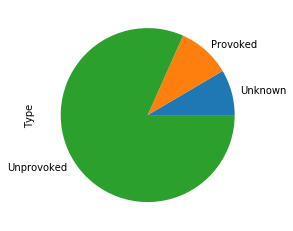

In [9]:
######################################################## TYPE ########################################################

F.renameF(df,"Type","Boat","Unprovoked")
F.renameF(df,"Type","Boating","Unprovoked")
F.renameF(df,"Type","Invalid","Unknown")
F.renameF(df,"Type","Sea Disaster","Unprovoked")

df["Type"].value_counts()
type_values = df["Type"].value_counts().sort_values()
type_values
display(type_values)
type_values.plot.pie()


/usr/local/Cellar/ipython/7.7.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.7.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.7.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/lo

Water sports     421
Diving           513
Fishing          958
Unknown          983
Surfing         1029
Swimming        1420
Name: Activity, dtype: int64

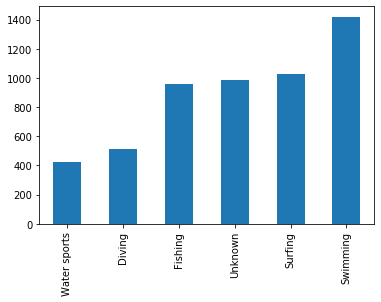

In [10]:
#################################################### ACTIVITY ########################################################

e = df["Activity"]

kite = e.apply(F.findF,args=("kite|board|kayak|cano|sail|wake|row",))
dive = e.apply(F.findF,args=("div",))
swim = e.apply(F.findF,args=("swim|wad|snork|water|float|bath",))
fish = e.apply(F.findF,args=("fish|collect",))
surf = e.apply(F.findF,args=("surf",))

for i in range(len(e)):
    if kite[i]!=None:
        df["Activity"][i] = "Water sports"
    elif dive[i]!=None:
        df["Activity"][i] = "Diving"
    elif swim[i]!=None:
        df["Activity"][i] = "Swimming"
    elif fish[i]!=None:
        df["Activity"][i] = "Fishing"
    elif surf[i]!=None:
        df["Activity"][i] = "Surfing"
    else:
        df["Activity"][i] = "Unknown"
    


df["Activity"].value_counts()
act_values = df["Activity"].value_counts().sort_values()
act_values
display(act_values)
act_values.plot.bar()



/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


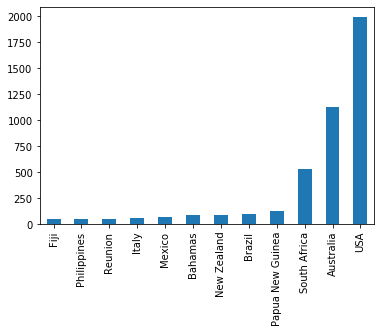

In [33]:
#################################################### COUNTRY ########################################################


country = df["Country"]
for x in range(len(country)):
    if country[x] == "Nan":
        df["Country"] = "Unknown"
    if re.search("(?i)\w\?",country[x]):
        country[x] = re.sub("\?","",country[x])
        df["Country"][x] = country[x].title()
    if country[x]!="USA" and country[x] != "UNITED ARAB EMIRATES (UAE)":
        df["Country"][x] = country[x].title()
    
df["Country"].value_counts()
country_values = df["Country"].value_counts().sort_values()
country_values_filtered = country_values[country_values>50]
country_values_filtered.plot.bar()







In [34]:
####################################################### NAMES ########################################################

df["Name"].apply(F.Check_names)

0               Unknown
1        Chucky Luciano
2               Unknown
3       Rory Angiolella
4               Unknown
             ...       
5319     Emil Uhlbrecht
5320     Henry Callahan
5321       Charles Duck
5322            Unknown
5323            Unknown
Name: Name, Length: 5324, dtype: object

In [35]:
######################################################### SURVIVAL ###################################################

survival = df["Fatal (Y/N)"]
serie = F.Fatality(survival)
            


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as ap

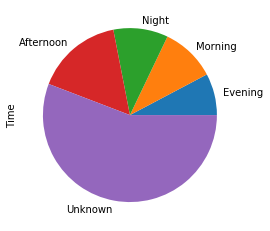

In [36]:
################################################### TIME #############################################################

#check unique values to unify time information

for t in range(0,len(df["Time"])):
    time = df["Time"][t]
#change values in %%h%%m format
    if re.search("\d\d+",time):
        split = (re.split("h",time))
        if split[0] < "12":
            df["Time"][t] = "Morning"
        elif split[0]>"12" and split[0]<"16":
            df["Time"][t] = "Afternoon"
        elif split[0]>"16" and split[0]<"20":
            df["Time"][t]="Evening"
        else:
            df["Time"][t] = "Night"    
#change other formats
    Morning = ["Dawn","AM","A.M.","daybreak","morning"]
    Afternoon = ["After","Midday","noon","lunch","Daytime"]
    Evening = ["P.M.","PM","Evening","dusk","sunset","sundown"]
    Night = ["night","Dark"]
    for m in Morning:
        F.find_Time(df,"Time",time,t,m,"Morning")
    for a in Afternoon:
        F.find_Time(df,"Time",time,t,a,"Afternoon")
    for e in Evening:
        F.find_Time(df,"Time",time,t,e,"Evening")        
    for n in Night:
        F.find_Time(df,"Time",time,t,n,"Night")                             
                        
    unknown = ["x","0","--","\xa0","  ","   "," ","nan"]
    for u in unknown:
        if re.match("(?i)"+u,time):
            F.find_Time(df,"Time",time,t,u,"Unknown")
            
    
    
    
df["Time"].value_counts()
time_values = df["Time"].value_counts().sort_values()
time_values.plot.pie()


In [37]:
################################################## SPECIES ###########################################################
# this column can be removed due to low amount of information
print("\n",df["Species "].value_counts())
df = df.drop("Species ",axis=1)
# pdf column can be removed because of its unusefullnes
df = df.drop("pdf",axis=1)
# age column can also be removed due to the lack of information
print("\n",df["Age"].value_counts())
df = df.drop("Age",axis=1)




 nan                                                                                                                  2389
White shark                                                                                                           154
Shark involvement not confirmed                                                                                        78
Tiger shark                                                                                                            64
Bull shark                                                                                                             47
                                                                                                                     ... 
Oceanic whitetip shar,; identified by Dr. W.C. Schoeder on photograph & Dr. L.P. L. Schultz on sketch by observer       1
24" to 30" shark                                                                                                        1
Grey nurse shark, 2.6 

In [38]:
####################################################### SEX ########################################################


sex = df["Sex "]
sex.value_counts()
for s in range(0,len(sex)):
    if re.search("M ",sex[s]):
        df["Sex "][s] = "M"
    elif re.search("[(nan)(lli)(.)(N)]",sex[s]):
        df["Sex "][s] = "Unknown"
        

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
####################################################### AREA ########################################################


area = df["Area"]
location = df["Location"]
for a in range(len(area)):
    if re.search("nan*",area[a]):
        df["Area"][a] = "Unknown"
    if re.search("nan*",location[a]):
        df["Location"][a] = "Unknown"


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
##################################################### CONCLUSION ########################################################


count_unp_day = [0,0,0]
n1 = 0
count_p_day = [0,0,0]
n2 = 0
count_unp_night = [0,0,0]
n3 = 0
count_p_night = [0,0,0]
n4 = 0

for x in range(len(df.Country)):
    if df["Country"][x] == "USA":
        if df["Fatal (Y/N)"][x] == "Y":
            if df["Type"][x] == "Unprovoked" and df["Time"][x] != "Night":
                n1+=1
                count_unp_day[0] = n1
            elif df["Type"][x] == "Unprovoked" and df["Time"][x] == "Night":
                n2+=1
                count_unp_night[0] = n2
            elif df["Type"][x] == "Provoked" and df["Time"][x] != "Night":
                n3+=1
                count_p_day[0] = n3
            elif df["Type"][x] == "Provoked" and df["Time"][x] == "Night":
                n4+=1
                count_p_night[0] = n4

    if df["Country"][x] == "AUSTRALIA":
        if df["Fatal (Y/N)"][x] == "Y":
            if df["Type"][x] == "Unprovoked" and df["Time"][x] != "Night":
                n1+=1
                count_unp_day[1] = n1
            elif df["Type"][x] == "Unprovoked" and df["Time"][x] == "Night":
                n2+=1
                count_unp_night[1] = n2
            elif df["Type"][x] == "Provoked" and df["Time"][x] != "Night":
                n3+=1
                count_p_day[1] = n3
            elif df["Type"][x] == "Provoked" and df["Time"][x] == "Night":
                n4+=1
                ccount_p_night[1] = n4
    
    if df["Country"][x] == "SOUTH AFRICA":
        if df["Fatal (Y/N)"][x] == "Y":
            if df["Type"][x] == "Unprovoked" and df["Time"][x] != "Night":
                n1+=1
                count_unp_day[2] = n1
            elif df["Type"][x] == "Unprovoked" and df["Time"][x] == "Night":
                n2+=1
                count_unp_night[2] = n2
            elif df["Type"][x] == "Provoked" and df["Time"][x] != "Night":
                n3+=1
                count_p_day[2] = n3
            elif df["Type"][x] == "Provoked" and df["Time"][x] == "Night":
                n4+=1
                ccount_p_night[2] = n4    
             
                
conc = {
        "COUNTRY": ["USA","USA","USA","USA","AUSTRALIA","AUSTRALIA","AUSTRALIA","AUSTRALIA","SOUTH AFRICA","SOUTH AFRICA","SOUTH AFRICA","SOUTH AFRICA"],
    "TIME": ["Day","Night","Day","Night","Day","Night","Day","Night","Day","Night","Day","Night"],
    "TYPE": ["Unprovoked","Provoked","Unprovoked","Provoked","Unprovoked","Provoked","Unprovoked","Provoked","Unprovoked","Provoked","Unprovoked","Provoked"],
    "ATTACKS": [count_unp_day[0],count_p_day[0],count_unp_night[0],count_p_night[0],count_unp_day[1],count_p_day[1],count_unp_night[1],count_p_night[1],count_unp_day[2],count_p_day[2],count_unp_night[2],count_p_night[2]]
}

conclusion = pd.DataFrame(conc,columns = ["COUNTRY","TIME","TYPE","ATTACKS"] )    
conclusion.set_index(["COUNTRY"],inplace = True, drop = True)
display(conclusion)           

,TIME,TYPE,ATTACKS
COUNTRY,,,
USA,Day,Unprovoked,115
USA,Night,Provoked,2
USA,Day,Unprovoked,11
USA,Night,Provoked,1
AUSTRALIA,Day,Unprovoked,0
AUSTRALIA,Night,Provoked,0
AUSTRALIA,Day,Unprovoked,0
AUSTRALIA,Night,Provoked,0
SOUTH AFRICA,Day,Unprovoked,0


In [41]:
df = df[["Country", "Area", "Year","Case Id","Type","Fatal (Y/N)","Time", "Sex ","Name","Activity","Injury","Location","Investigator or Source","href"]]
df.set_index(["Country", "Area", "Year"], inplace = True, drop = True)
df.head(20)


Case Id        Type Fatal (Y/N)  \
Country       Area                  Year                                   
USA           Florida               2016       0  Unprovoked           N   
                                    2016       1  Unprovoked           N   
                                    2016       2  Unprovoked           N   
Australia     Victoria              2016       3  Unprovoked           N   
                                    2016       4  Unprovoked           N   
              Western Australia     2016       5  Unprovoked           N   
USA           Florida               2016       6  Unprovoked           N   
              Hawaii                2016       7  Unprovoked           N   
New Caledonia North Province        2016       8  Unprovoked           Y   
USA           Unknown               2016       9  Unprovoked           N   
Australia     Western Australia     2016      10  Unprovoked           N   
USA           Florida               2016      11  Unprovoked           N   
              California            2016      12  Unprovoked           N   
              Florida               2016      13  Unprovoked           N   
                                    2016      14  Unprovoked           N   
Reunion       Unknown               2016      15  Unprovoked           N   
USA           Florida               2016      16  Unprovoked           N   
Bahamas       New Providence Island 2016      17  Unprovoked           N   
USA           Hawaii                2016      18  Unprovoked           N   
              Florida               2016      19  Unprovoked           N   

                                               Time     Sex   \
Country       Area                  Year                       
USA           Florida               2016  Afternoon        M   
                                    2016    Morning        M   
                                    2016    Morning        M   
Australia     Victoria              2016    Unknown        M   
                                    2016    Unknown        M   
              Western Australia     2016    Unknown  Unknown   
USA           Florida               2016  Afternoon        M   
              Hawaii                2016  Afternoon        F   
New Caledonia North Province        2016  Afternoon        M   
USA           Unknown               2016  Afternoon        F   
Australia     Western Australia     2016  Afternoon        M   
USA           Florida               2016    Unknown        M   
              California            2016    Unknown        M   
              Florida               2016  Afternoon        M   
                                    2016  Afternoon        M   
Reunion       Unknown               2016    Evening        M   
USA           Florida               2016      Night        M   
Bahamas       New Providence Island 2016    Unknown        M   
USA           Hawaii                2016    Unknown        M   
              Florida               2016    Unknown        M   

                                                            Name  \
Country       Area                  Year                           
USA           Florida               2016                    male   
                                    2016          Chucky Luciano   
                                    2016                    male   
Australia     Victoria              2016         Rory Angiolella   
                                    2016                    male   
              Western Australia     2016  Occupant: Ben Stratton   
USA           Florida               2016                    male   
              Hawaii                2016                  female   
New Caledonia North Province        2016            David Jewell   
USA           Unknown               2016          Rylie Williams   
Australia     Western Australia     2016           Fraser Penman   
USA           Florida               2016            Austin Moore   
       

In [42]:
export_csv1 = df.to_csv("./OUTPUT/SharckAttack_clean_csv.csv", index=None,header=True)
export_csv2 = conclusion.to_csv("./OUTPUT/Conclusions_csv.csv", index=None,header=True)
